In [ ]:
from functions import *
import datetime as dt
import matplotlib.pyplot as plt

In [84]:
event_date = 20220310

#Path for the downloaded data
path = '/home/smurf/solo/data/'
#Path to save plots
file_path = f'/home/smurf/serpentine/eventlist/{event_date}/'
#Path for plot of highest peak flux and earliest onset time
file_path_max = f'/home/smurf/serpentine/eventlist/{event_date}/max_{event_date}/'

#Plot time range
sdate = datetime.date(2022, 3, 10)
edate = datetime.date(2022, 3, 11)
plot_range = [dt.datetime(2022, 3, 10, 0),dt.datetime(2022, 3, 11, 23)]

In [85]:
#Get event data
event_onset = Event(spacecraft='sta', sensor='sept', data_level='l2', species = 'e', start_date=sdate, end_date=edate, data_path=path)

100%|█████████████████████████████████████| 1.20M/1.20M [00:00<00:00, 1.16GB/s]
SHA256 hash of downloaded file: d00cb77e77a59a723ca314c9b6deffd9516453c773d9d3e757d68d8f11b42828
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 1.20M/1.20M [00:00<00:00, 1.05GB/s]
SHA256 hash of downloaded file: e90927c05ff21b0309dae2d36d231d4e68fa7ca9f468f27f4af0b44a294695ae
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|████████████████████████████████████████| 641k/641k [00:00<00:00, 581MB/s]
SHA256 hash of downloaded file: 188078d3229c5ae4b2572f8c2d501bad94a7d9b2699ea97733dc28d152199fdc
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|████████████████████████████████

In [86]:
#Particle type for filename
#Channels: HET_e=[0,1], EPT_e=[14,18], HET_p=[19,24]
# Stereo-A SEPT electrons [6, 7]
'''
if event_onset.sensor == 'het':
    if event_onset.species == 'p':
        particle_type = 'HET_p'
        particle_ch = [19, 24]
    else:
        particle_type = 'HET_e'
        particle_ch = [0, 1]

else:
    particle_type = 'EPT_e'
    particle_ch = [14, 18]
'''
    
if(event_onset.spacecraft == 'sta'):
    if(event_onset.sensor == 'sept'):
        if(event_onset.species == 'e'):
            particle_type = 'SEPT_e'
            particle_ch = [6, 7]
        else:
            particle_type = 'SEPT_p'
            particle_ch = []
    
#Add particle specific folder to file path
file_path = file_path + particle_type + '_' + str(event_date) + '/'

In [87]:
file_path

'/home/smurf/serpentine/eventlist/20220310/SEPT_e_20220310/'

# Event plots

In [88]:
#Determine resample period (e.g. 10min, 30S)

averaging = '10min'

In [98]:
# Determine and adjust background start and length (e.g. 3, 8.1)

bg_start_sun = 5
bg_length_sun = 15

bg_start_asun = 5
bg_length_asun = 15

bg_start_north = 5
bg_length_north = 15

bg_start_south = 5
bg_length_south = 15

shrink = 100

##### >Energy channels< #####
85-125 keV
#############################

##### >Flux peak< #####
time
2022-03-11 06:55:00    133.78605
Freq: 10T, dtype: float64
#######################

##### >Onset time< #####
2022-03-10 23:45:00
########################

##### >Mean of background intensity< #####
7.978985748333332
##########################################

##### >Std of background intensity< #####
2.1158319116608535
#########################################

##### >Particle species< #####
electrons
##############################



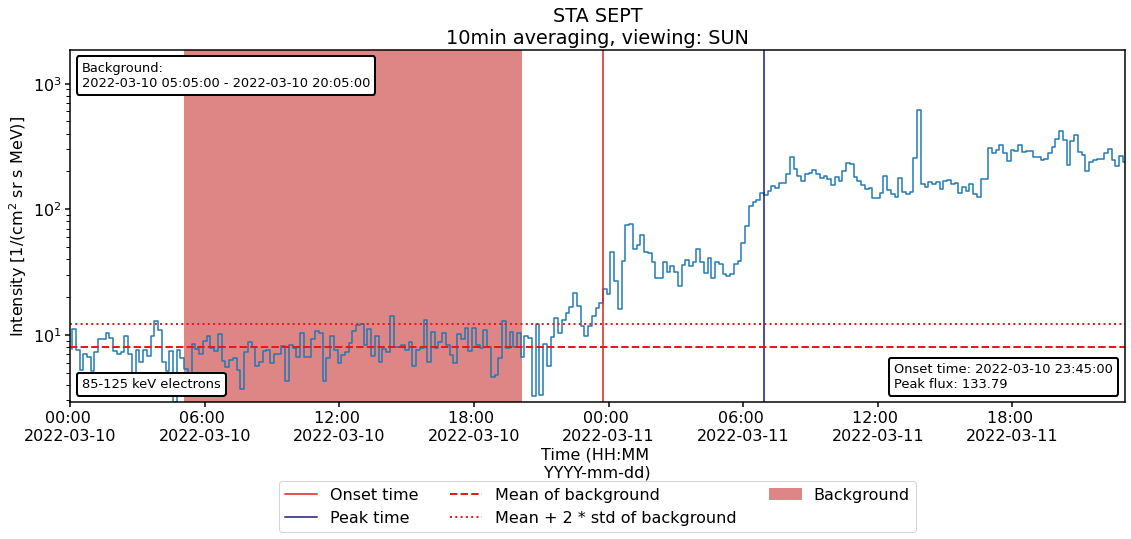

##### >Energy channels< #####
85-125 keV
#############################

##### >Flux peak< #####
time
2022-03-11 06:35:00    118.6441
Freq: 10T, dtype: float64
#######################

##### >Onset time< #####
2022-03-10 23:45:00
########################

##### >Mean of background intensity< #####
6.966643144444446
##########################################

##### >Std of background intensity< #####
1.9605228380530073
#########################################

##### >Particle species< #####
electrons
##############################



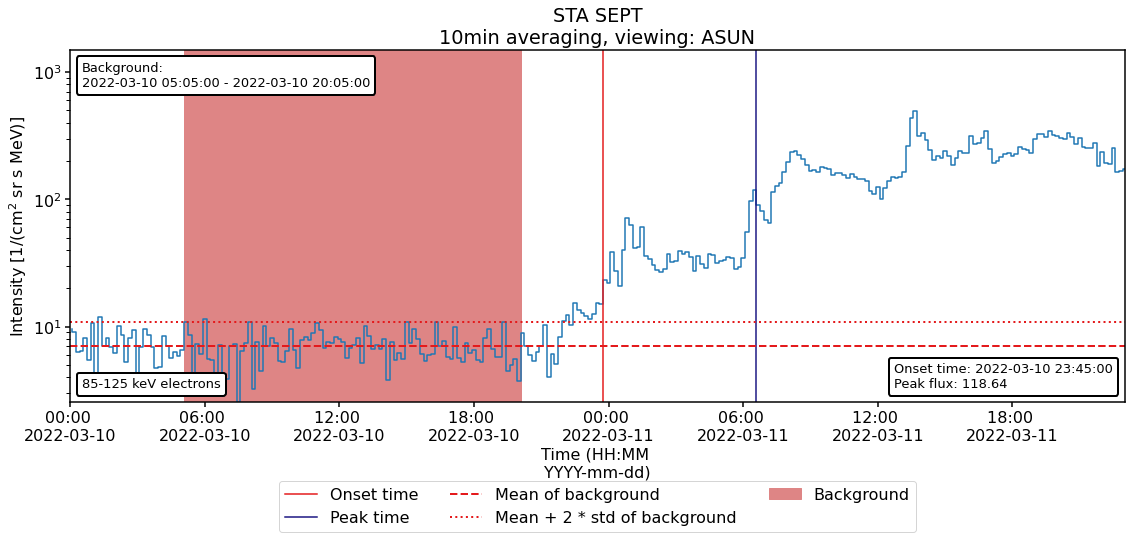

##### >Energy channels< #####
85-125 keV
#############################

##### >Flux peak< #####
time
2022-03-11 06:35:00    81.4932
Freq: 10T, dtype: float64
#######################

##### >Onset time< #####
2022-03-10 23:45:00
########################

##### >Mean of background intensity< #####
6.654340204444446
##########################################

##### >Std of background intensity< #####
1.8672639424851107
#########################################

##### >Particle species< #####
electrons
##############################



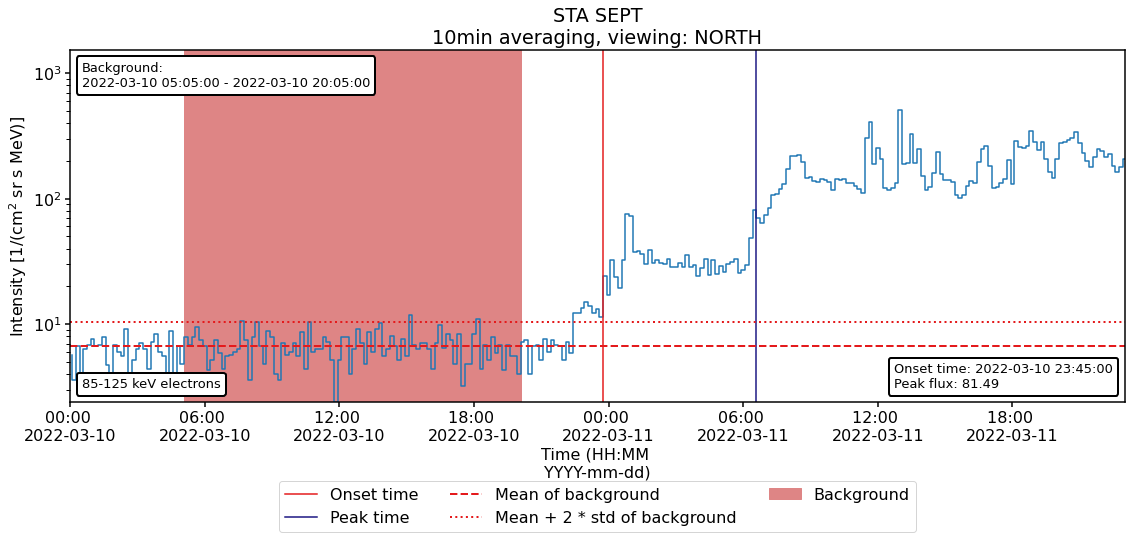

##### >Energy channels< #####
85-125 keV
#############################

##### >Flux peak< #####
time
2022-03-11 06:15:00    231.22655
Freq: 10T, dtype: float64
#######################

##### >Onset time< #####
2022-03-10 21:35:00
########################

##### >Mean of background intensity< #####
7.499110977777776
##########################################

##### >Std of background intensity< #####
1.6626396695603731
#########################################

##### >Particle species< #####
electrons
##############################



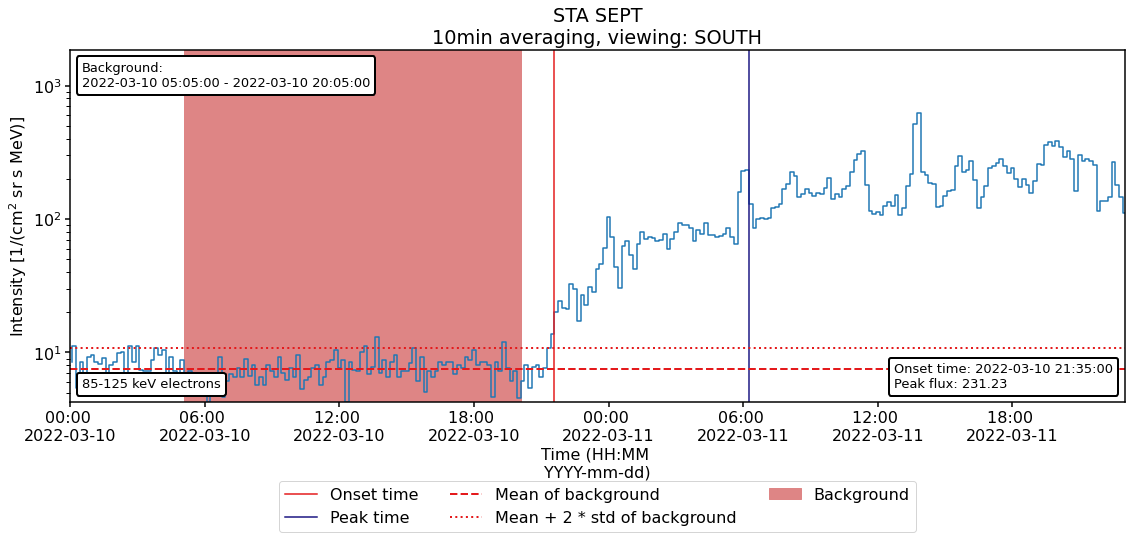

In [99]:
#Generate event plots for different viewing directions

flux_sun, onset_stats, onset_found, peak_flux_sun, peak_time_sun, fig_sun = event_onset.analyse(viewing='sun', bg_start=bg_start_sun, bg_length=bg_length_sun, channels=particle_ch, resample_period=averaging, yscale='log', cusum_window=30, xlim=plot_range, shrink=shrink)
onset_sun = onset_stats[-1]
peak_flux_sun = peak_flux_sun.values[0]

flux_asun, onset_stats, onset_found, peak_flux_asun, peak_time_asun, fig_asun = event_onset.analyse(viewing='asun', bg_start=bg_start_asun, bg_length=bg_length_asun, channels=particle_ch, resample_period=averaging, yscale='log', cusum_window=30, xlim=plot_range, shrink=shrink)
onset_asun = onset_stats[-1] 
peak_flux_asun = peak_flux_asun.values[0]

flux_north, onset_stats, onset_found, peak_flux_north, peak_time_north, fig_north = event_onset.analyse(viewing='north', bg_start=bg_start_north, bg_length=bg_length_north, channels=particle_ch, resample_period=averaging, yscale='log', cusum_window=30, xlim=plot_range, shrink=shrink)
onset_north = onset_stats[-1] 
peak_flux_north = peak_flux_north.values[0]

flux_south, onset_stats, onset_found, peak_flux_south, peak_time_south, fig_south = event_onset.analyse(viewing='south', bg_start=bg_start_south, bg_length=bg_length_south, channels=particle_ch, resample_period=averaging, yscale='log', cusum_window=30, xlim=plot_range, shrink=shrink)
onset_south = onset_stats[-1] 
peak_flux_south = peak_flux_south.values[0]

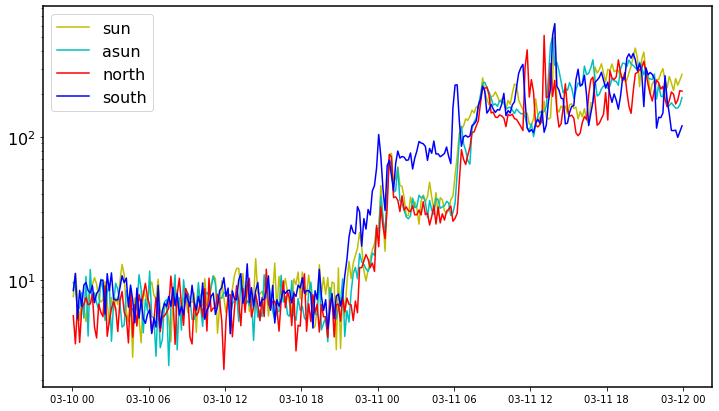

In [91]:
#Plot event data as continuous plot

f, ax = plt.subplots(1, figsize=(12,7))
ax.plot(flux_sun, label='sun', color="y")
ax.plot(flux_asun,label='asun', color="c")
ax.plot(flux_north,label='north', color="r")
ax.plot(flux_south,label='south', color="b")
ax.legend()
ax.set_yscale('log')
ax.tick_params(axis='x', labelsize=10)

# Onset values

In [74]:
#Onset times
print('SUN:', onset_sun)
print('ASUN:', onset_asun)
print('NORTH:', onset_north)
print('SOUTH:', onset_south)

SUN: 2022-01-30 00:04:30
ASUN: 2022-01-30 01:16:30
NORTH: 2022-01-30 00:58:30
SOUTH: 2022-01-30 01:07:30


# Peak flux values

In [75]:
#Peak fluxes & times
print('SUN:')
print("{:.2E}".format(peak_flux_sun))
print(peak_time_sun)
print('ASUN:')
print("{:.2E}".format(peak_flux_asun))
print(peak_time_asun)
print('NORTH:')
print("{:.2E}".format(peak_flux_north))
print(peak_time_north)
print('SOUTH:')
print("{:.2E}".format(peak_flux_south))
print(peak_time_south)

SUN:
1.07E+02
2022-01-30 02:10:30
ASUN:
1.05E+02
2022-01-30 03:49:30
NORTH:
9.15E+01
2022-01-30 03:31:30
SOUTH:
1.22E+02
2022-01-30 02:19:30


# First onset & maximum peak flux

In [76]:
# First onset time & sector
os = [onset_sun, onset_asun, onset_north, onset_south]
min_os = min(os)
min_os_index = os.index(min_os)

print('First onset time:', min_os)
if min_os_index == 0:
    print('Viewing: SUN')
    os_min = 'sun'
elif min_os_index == 1:
    print('Viewing: ASUN')
    os_min = 'asun'
elif min_os_index == 2:
    print('Viewing: NORTH')
    os_min = 'north'
else:
    print('Viewing: SOUTH')
    os_min = 'south'
    
#For comparing onset times  
if averaging == '10min':
    ten_os = os_min + str(min_os)
elif averaging == '5min':
    five_os = os_min + str(min_os)
elif averaging == '3min':
    three_os = os_min + str(min_os)
elif averaging == '2min':
    two_os = os_min + str(min_os)
elif averaging == '1min':
    one_os = os_min + str(min_os)
elif averaging == '30S':
    thirty_os = os_min + str(min_os)

First onset time: 2022-01-30 00:04:30
Viewing: SUN


In [77]:
#Maximum peak flux value, sector & time
peaks = [peak_flux_sun, peak_flux_asun, peak_flux_north, peak_flux_south]
max_peaks = max(peaks)
max_peaks_index = peaks.index(max_peaks)

if max_peaks_index == 0:
    print('Max peak flux time:', peak_time_sun)
    print('Viewing: SUN')
    if averaging == '10min':
        filename_flux_max = f'{file_path_max}STA_{particle_type}_sun_{event_date}_{averaging}.png'
        view_max = 'sun'
        
elif max_peaks_index == 1:
    print('Max peak flux time:', peak_time_asun)
    print('Viewing: ASUN')
    if averaging == '10min':
        filename_flux_max = f'{file_path_max}STA_{particle_type}_asun_{event_date}_{averaging}.png'
        view_max = 'asun'
        
elif max_peaks_index == 2:
    print('Max peak flux time:', peak_time_north)
    print('Viewing: NORTH')
    if averaging == '10min':
        filename_flux_max = f'{file_path_max}STA_{particle_type}_north_{event_date}_{averaging}.png'
        view_max = 'north'
else:
    print('Max peak flux time:', peak_time_south)
    print('Viewing: SOUTH')
    if averaging == '10min':
        filename_flux_max = f'{file_path_max}STA_{particle_type}_south_{event_date}_{averaging}.png'
        view_max = 'south'
        
print('Max peak flux:',"{:.2E}".format(max_peaks))

Max peak flux time: 2022-01-30 02:19:30
Viewing: SOUTH
Max peak flux: 1.22E+02


# Saving figures

### Save sector with maximum peak flux

In [54]:
#Create file name for maximum peak flux plot (if averaging is 10min)
filename_flux_max = f'{file_path_max}STA_{particle_type}_{view_max}_{event_date}_{averaging}.png'

In [55]:
#Check right filename
filename_flux_max

'/home/smurf/serpentine/eventlist/20220129/max_20220129/STA_SEPT_e_south_20220129_10min.png'

In [57]:
#Save maximum peak flux plot
if view_max == 'sun':
    fig_sun.savefig(filename_flux_max, facecolor= 'white', transparent=False)
elif view_max == 'asun':
    fig_asun.savefig(filename_flux_max, facecolor= 'white', transparent=False)
elif view_max == 'north':
    fig_north.savefig(filename_flux_max, facecolor= 'white', transparent=False)
elif view_max == 'south':
    fig_south.savefig(filename_flux_max, facecolor= 'white', transparent=False)

### Save sector with first onset

In [78]:
#Create file name for first onset plot
filename_first_onset = f'{file_path_max}STA_{particle_type}_{os_min}_{event_date}_{averaging}.png'

In [79]:
filename_first_onset

'/home/smurf/serpentine/eventlist/20220129/max_20220129/STA_SEPT_e_sun_20220129_9min.png'

In [80]:
#Save first onset time plot
if os_min == 'sun':
    fig_sun.savefig(filename_first_onset, facecolor= 'white', transparent=False)
elif os_min == 'asun':
    fig_asun.savefig(filename_first_onset, facecolor= 'white', transparent=False)
elif os_min == 'north':
    fig_north.savefig(filename_first_onset, facecolor= 'white', transparent=False)
elif os_min == 'south':
    fig_south.savefig(filename_first_onset, facecolor= 'white', transparent=False)

### Save figures from all viewings

In [81]:
#Create file name for plots
filename_sun = f'{file_path}STA_{particle_type}_sun_{event_date}_{averaging}.png'
filename_asun = f'{file_path}STA_{particle_type}_asun_{event_date}_{averaging}.png'
filename_north = f'{file_path}STA_{particle_type}_north_{event_date}_{averaging}.png'
filename_south = f'{file_path}STA_{particle_type}_south_{event_date}_{averaging}.png'

In [82]:
#Check right filename
filename_sun

'/home/smurf/serpentine/eventlist/20220129/SEPT_e_20220129/STA_SEPT_e_sun_20220129_9min.png'

In [83]:
#Save plots
fig_sun.savefig(filename_sun, facecolor= 'white', transparent=False)
fig_asun.savefig(filename_asun, facecolor= 'white', transparent=False)
fig_north.savefig(filename_north, facecolor= 'white', transparent=False)
fig_south.savefig(filename_south, facecolor= 'white', transparent=False)

In [ ]:
#Compare first onset times with different averagings
print('Times of first onsets:')
try:
    ten_os
    print('10min:')
    print(ten_os)
except NameError:
    print('10min:')
    print('Not defined')
    
try:
    five_os
    print('5min:')
    print(five_os)
except NameError:
    print('5min:')
    print('Not defined')
    
try:
    three_os
    print('3min:')
    print(three_os)
except NameError:
    print('3min:')
    print('Not defined')
    
try:
    two_os
    print('2min:')
    print(two_os)
except NameError:
    print('2min:')
    print('Not defined')
    
try:
    one_os
    print('1min:')
    print(one_os)
except NameError:
    print('1min:')
    print('Not defined')
    
try:
    thirty_os
    print('30S:')
    print(thirty_os)
except NameError:
    print('30S:')
    print('Not defined')